In [1]:
import numpy as np
from SVM import *
%load_ext autoreload
%autoreload 2
import scipy.io
%matplotlib inline

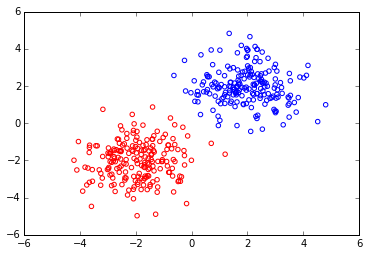

In [2]:
filename = "data_stdev1"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

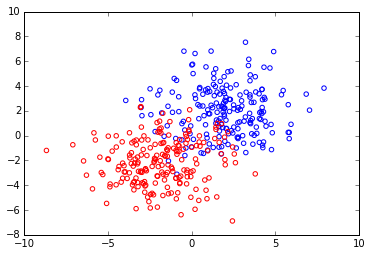

In [3]:
filename = "data_stdev2"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

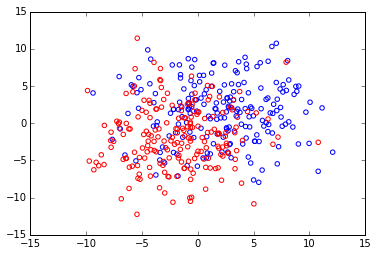

In [4]:
filename = "data_stdev4"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

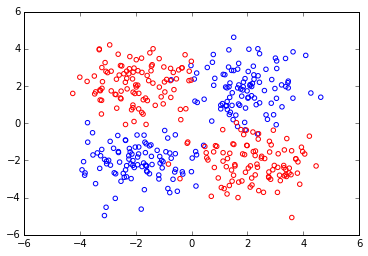

In [5]:
filename = "data_nonsep"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

## Primal Forms

___

### Primal form for Hard-SVM

To get us in the right mindset, consider the primal form of the Hard-SVM:

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

Note that this is only valid for linearly separable data, since we need $y^{(i)}(\theta^Tx^{(i)} + \theta_0) /ge 0$ for all $i$.

We can see how this is ill-posed since $\theta$ can just be scaled by a non-zero scalar and the objective function value does not change.  (To illustrate... we can take out the scalar $c$ from the 2-norm in the denominator, and outside the minimization since $c$ is not a function of $i$, and they cancel)

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||c\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(c\theta^Tx^{(i)} + c\theta_0)$$

$$= \underset{\theta, \theta_0}{\text{max}} \frac{c}{c||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||} \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0)$$

We exploit this ambiguity and choose the scale such that the inside minimization is set to 1.

$$ \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0) = 1 $$

This lets us separate our "max-min" problem into one maximization problem with a constraint:

$$ \underset{\theta, \theta_0}{\text{max}} \frac{1}{||\theta||}, \ \ \ s.t. \underset{1 \le i \le n}{\text{min}} y^{(i)}(\theta^Tx^{(i)} + \theta_0) = 1$$

We then convert the objective to a minimization (nicer to hand to solvers) and the constraint into a linear inequality:

$$ \underset{\theta, \theta_0}{\text{min}} \  ||\theta||^2, \ \ \ s.t. y^{(i)}(\theta^Tx^{(i)} + \theta_0) \ge 1, \ \ \ 1 \le i \le n$$


### Primal form for the Soft-SVM

That seems nice, and lets us find an optimal decision boundary for data that is easily separated.  (Kind of like getting a gold medal in skipping.)  But what if the data is not linearly separable?  This is a little more interesting.

To allow data that is not linearly separable, we add a slack variable $\xi_i \ge 0$ for each data point:

$$ \underset{\theta, \theta_0, \xi}{\text{min}} \  ||\theta||^2 + C \sum_{i=1}^n \xi_i, \ \ \ s.t. y^{(i)}(\theta^Tx^{(i)} + \theta_0) \ge 1 - \xi_i, \ \ \ \xi_i \ge 0,  1 \le i \le n$$



This is called **Soft-SVM**.  The slack variables allow the data to not be linearly separable, but adding the sum of the slack variables to the objective function encodes that the violation of linear separability will be minimal.



## Dual Forms

___

### Dual form for the Hard-SVM

Ask for some help from our friend Joe Lagrange and arrive at the **dual form for the Hard-SVM**:

$$ \underset{a \in \mathbb{R}^N}{max} \sum_{i=1}^Na_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_na_mt_nt_mk(\mathbf{x}_n, \mathbf{x}_m)$$

$$s.t. a_n \ge 0, \ \ \ n = 1,...,N $$

$$s.t. \sum_{n=1}^Na_nt_n = 0$$

Where we have our kernel function (which needs to be valid) as the inner product in feature space: $k(\mathbf{x}, \mathbf{x}') = \phi(\mathbf{x})^T\phi(\mathbf{x}')$

The KKT conditions require that the constraints can be formulated as:

$$s.t. a_n \ge 0, \ \ \ n = 1,...,N $$

$$s.t. t_ny(\mathbf{x}_n) - 1 \ge 0 $$

$$a_n \{ t_ny(\mathbf{x}_n) -1 \} = 0 $$

We can see that any data point for which $a_n = 0$ will not appear in the sum used to predict classification labels for new data points:

$$ y(\mathbf{x}) = \sum_{n=1}^N a_nt_nk(\mathbf{x},\mathbf{x}_n) + b$$

Hence giving the SVM its "sparse" dependence on training data.

It is only the data points that satisfy $t_ny(\mathbf{x}_n)=1$ that are used for prediction -- these are the **support vectors**.

We can solve for $b$ via:

$$ b = \frac{1}{N_\mathcal{S}} \sum_{n \in \mathcal{S}} \bigg(t_n  - \sum_{m \in \mathcal{S}} a_mt_mk(\mathbf{x}_n, \mathbf{x}_m) \bigg) $$

Where $\mathcal{S}$ denotes the set of indices of the support vectors, and $N_{\mathcal{S}}$ is the number of support vectors.



### Dual form for the Soft-SVM

... I don't quite follow yet, but the dual form of the SVM is:

$$ \underset{\alpha \in \mathbb{R}^N}{\text{max}} \sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N a_na_mt_nt_mk(\mathbf{x}_n, \mathbf{x}_m)$$

$$ s.t. 0 \le a_n \le C $$

$$ s.t. \sum_{n=1}^N a_nt_n = 0 $$

Where again the $n$ for which $t_ny(\mathbf{x}_n)=1$ holds are the indices of the support vectors.  Note also that $C$ controls the tradeoff between the slack variable penalty and the margin.

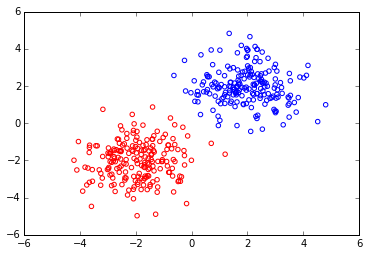

In [6]:
filename = "data_stdev1"
svm = SVM.fromFile(filename, type="train")
svm.plotData()

In [7]:
a = np.zeros((svm.N, 1))[:,0] 
a[2]=2
a[-9] = 9
print np.sum(a)

11.0


In [8]:
double_sum = 1
double_sum += 1


print double_sum

2


### Install cvxopt

Note that you'll need to install cvxopt, an optimization package for Python:

    Instructions at http://cvxopt.org/download/index.html

Quick install:

    git clone https://github.com/cvxopt/cvxopt.git
    sudo python setup.py install
    

### Read cvxopt documentation

The relevant documentation for us can be found here: http://cvxopt.org/userguide/coneprog.html#quadratic-programming

### Solving the SVM

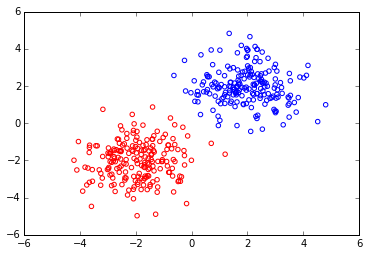

In [9]:
svm.plotData()

In [10]:
print svm.x.shape
svm.computeSolution()

(400, 2)
     pcost       dcost       gap    pres   dres
 0: -4.4193e+01 -7.6807e+02  4e+03  3e+00  2e-14
 1: -2.5625e+01 -4.0062e+02  7e+02  3e-01  2e-14
 2: -9.8118e+00 -5.7793e+01  8e+01  3e-02  9e-15
 3: -6.4730e+00 -2.5050e+01  3e+01  1e-02  4e-15
 4: -4.3213e+00 -1.6635e+01  2e+01  8e-03  3e-15
 5: -2.3964e+00 -5.0388e+00  4e+00  1e-03  2e-15
 6: -2.4183e+00 -2.6473e+00  3e-01  6e-05  2e-15
 7: -2.4593e+00 -2.4861e+00  3e-02  2e-06  2e-15
 8: -2.4700e+00 -2.4703e+00  4e-04  3e-08  2e-15
 9: -2.4701e+00 -2.4701e+00  4e-06  3e-10  2e-15
10: -2.4701e+00 -2.4701e+00  4e-08  3e-12  2e-15
Optimal solution found.


array([[  1.52428988e-11],
       [  5.67928777e-12],
       [  3.32061536e-12],
       [  9.50991898e-12],
       [  5.17325993e-12],
       [  2.27870511e-11],
       [  1.16510413e-11],
       [  1.72567218e-11],
       [  5.11802663e-12],
       [  6.07074175e-12],
       [  3.71186275e-12],
       [  6.82675435e-12],
       [  8.98827929e-12],
       [  1.23262157e-10],
       [  7.07345029e-12],
       [  1.41367673e-10],
       [  5.85922846e-12],
       [  5.56764249e-12],
       [  3.02574645e-12],
       [  3.78322579e-12],
       [  7.90202499e-12],
       [  1.22147114e-11],
       [  1.36518488e-11],
       [  2.56891058e-11],
       [  8.27418432e-12],
       [  5.97132527e-12],
       [  7.75841583e-12],
       [  3.34296130e-11],
       [  1.20253856e-11],
       [  1.00000000e+00],
       [  7.15636482e-12],
       [  3.44941164e-11],
       [  1.33982698e-11],
       [  7.66866052e-12],
       [  6.09370655e-12],
       [  5.89372710e-12],
       [  2.59423990e-11],
 

In [11]:
supportVectorsIdx = np.where(svm.a > 1e-6)[0]
print np.shape(a)
print supportVectorsIdx.size
print supportVectorsIdx

(400,)
5
[ 29 160 178 216 382]


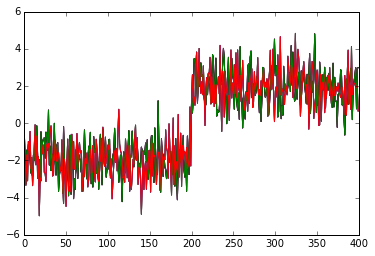

In [12]:
for i in supportVectorsIdx:
    plt.plot(svm.x)